## Ablation Study

In [29]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    'font.size' : 14,
    "font.sans-serif": "Times",
})
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 500


/tmp/ipykernel_19424/2463816977.py:173: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  custom_handle = mpatches.Patch(color='white', label=f'{pad}{custom_text}', edgecolor='none')  # Invisible patch


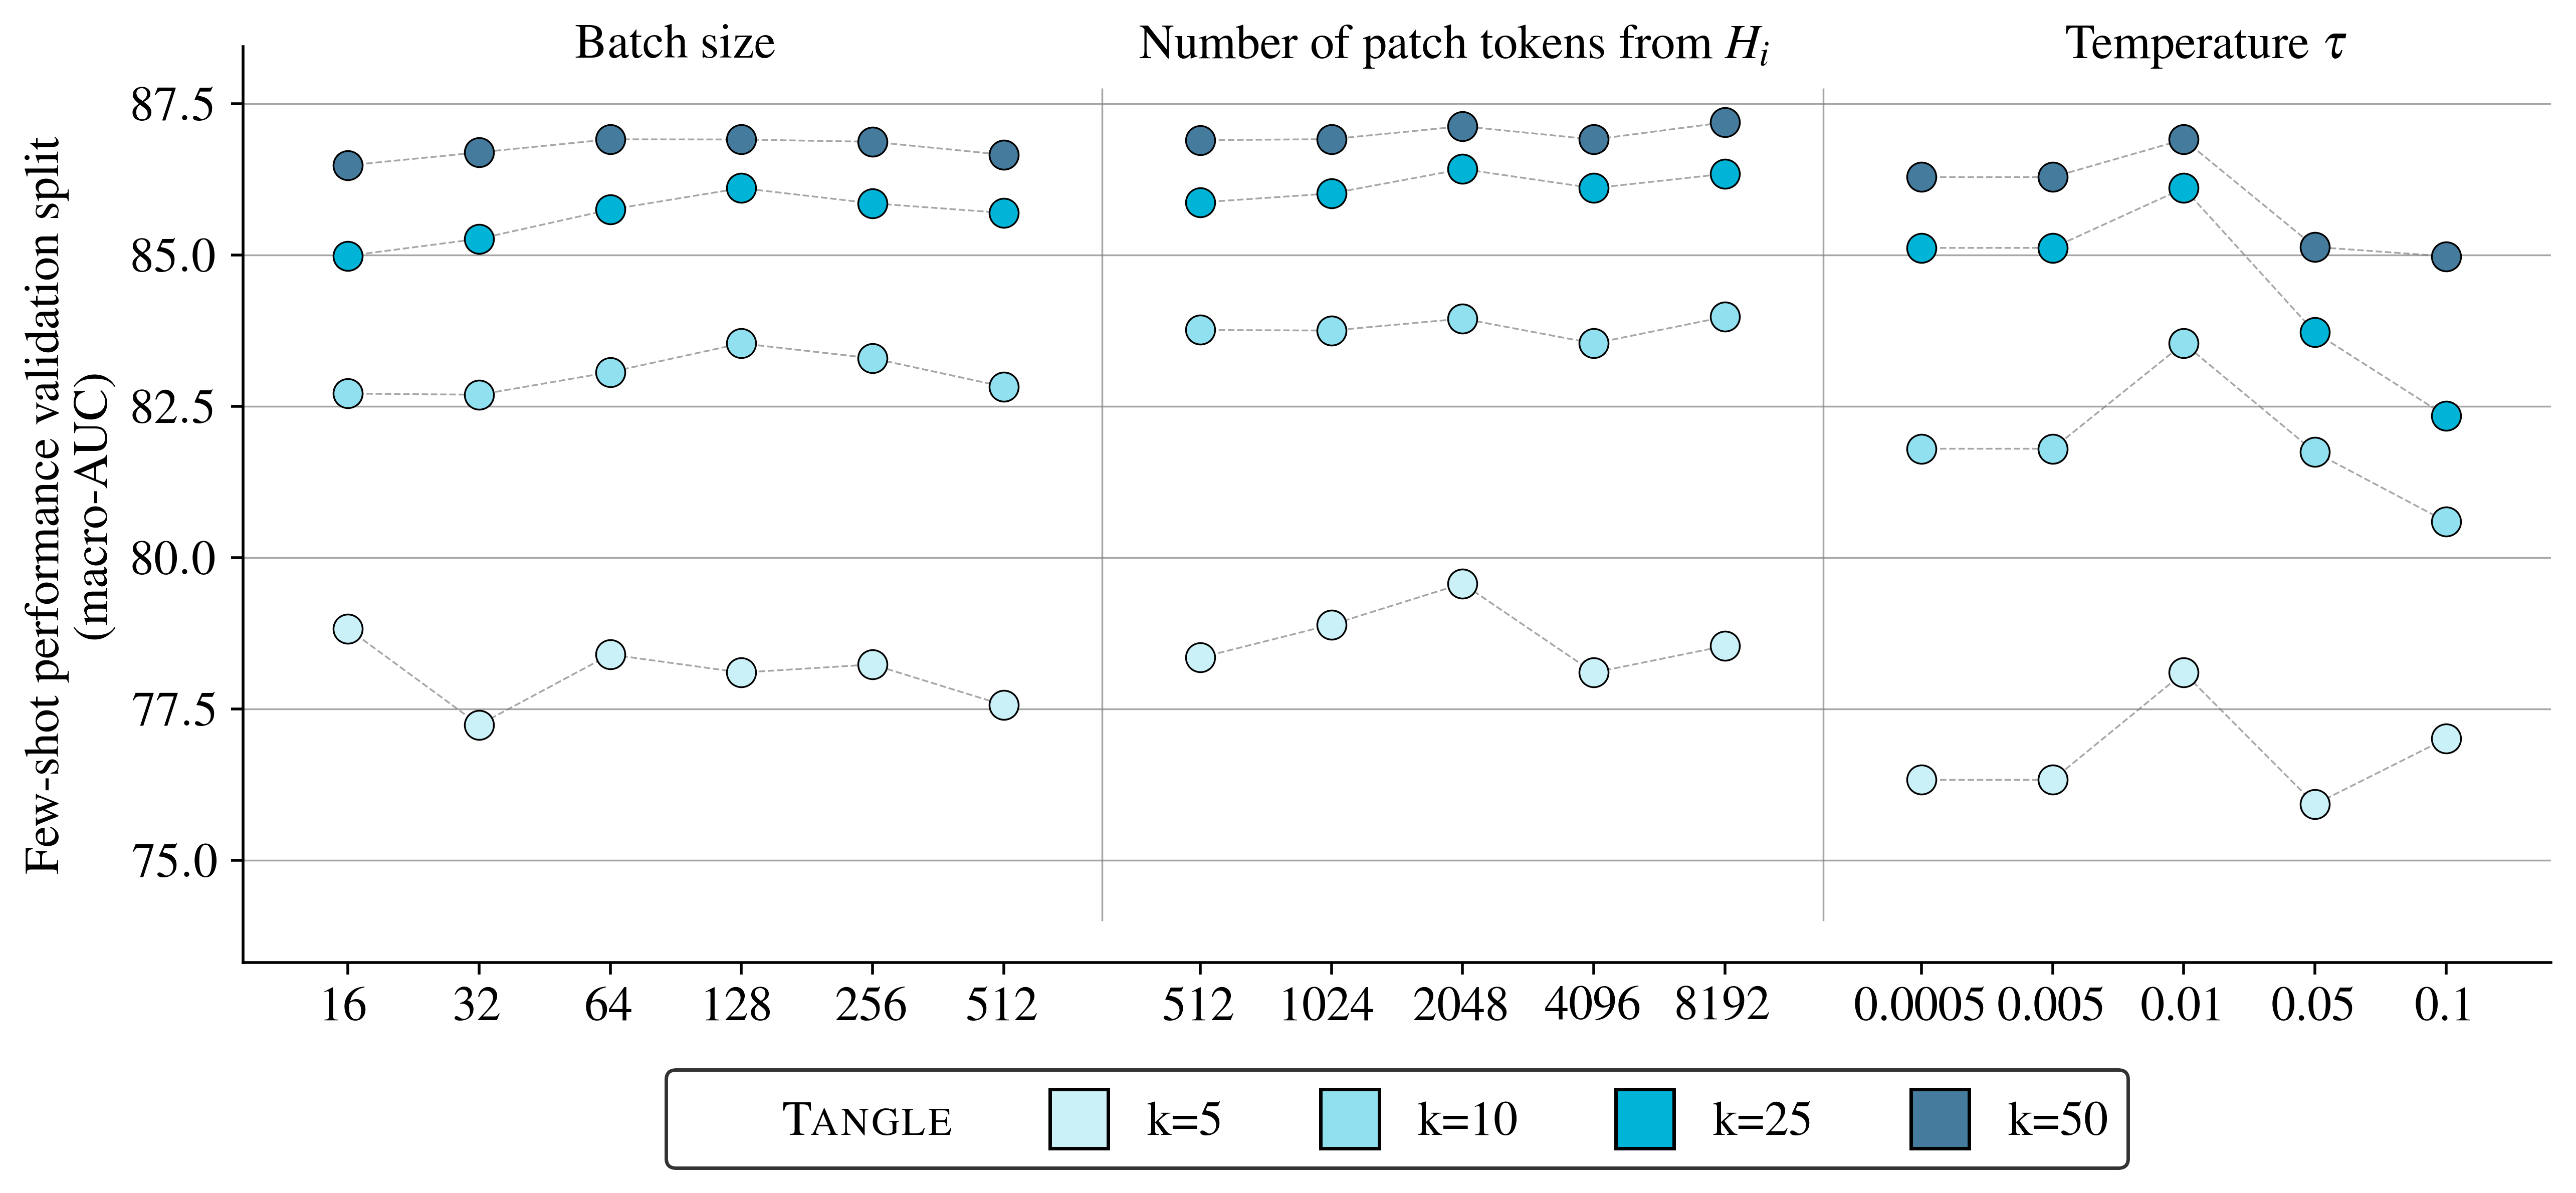

In [15]:
import pandas as pd
import numpy as np 
import re
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

results_csv_path = ''
few_shots = [5,10,25,50]
string_x_axis = True
metric = "AUC"
remove_idx_bs = []
remove_idx_token = [0,1,2,3,4]
remove_idx_t = [0,2]
circle_sizes = [70] * 5 
panel_margin = 0.5
ball_linewidth = 0.5
colors = ['#caf0f8', '#90e0ef', '#00b4d8', '#457B9D'] 
data = pd.read_csv(results_csv_path)
models = list(set(list(data["model_name"].values)))


model_values_mean = {}
model_values_std = {}
for model in models:
    model_values_mean[f"{model}"] = {}
    model_values_std[f"{model}"] = {}
    for k in few_shots:
        temp = []
        for lesion in data["lesion"].unique():
            if isinstance(data["k"][0], str):
                temp.append(data[(data['model_name']==model) & (data["k"]==f"{k}") & (data['metric']==metric) & (data['lesion'] == lesion)]["score"].mean())  
            else:
                temp.append(data[(data['model_name']==model) & (data["k"]==k) & (data['metric']==metric) & (data['lesion'] == lesion)]["score"].mean())
        key_k = f'{k}' if string_x_axis else k
        model_values_mean[f"{model}"][key_k] = np.mean(temp) 
        model_values_std[f"{model}"][key_k] = np.std(temp)
        
y_token_values = []
y_bs_values = []
y_t_values = []

for i in range(len(few_shots)):
    df = pd.DataFrame.from_dict(model_values_mean)
    token_values = df.filter(regex='_tok')
    x_token_values = list(token_values.columns)
    x_token_values = [re.findall(r'\d+',str.split("_")[-1])[0] for str in x_token_values]
    x_token_values = list(map(int, x_token_values))
    y_token_values.append(list(token_values.values[i]))

    bs_values = df.filter(regex='_bs')
    x_bs_values = list(bs_values.columns)
    x_bs_values = [re.findall(r'\d+',str.split("_")[-1])[0] for str in x_bs_values]
    x_bs_values = list(map(int, x_bs_values))
    y_bs_values.append(list(bs_values.values[i]))

    t_values = df.filter(regex='_t0')
    x_t_values = list(t_values.columns)
    x_t_values = [float(str.split("_")[-1].replace("t", "")) for str in x_t_values]
    x_t_values = list(map(float, x_t_values))
    y_t_values.append(list(t_values.values[i]))

x_bs_values = np.array(x_bs_values)
y_bs_values = np.array(y_bs_values)

x_token_values = np.array(x_token_values)
y_token_values = np.array(y_token_values)

x_t_values = np.array(x_t_values)
y_t_values = np.array(y_t_values)

sorted_indices_bs = np.argsort(x_bs_values)
y_bs_values_sorted = np.array([y_row[sorted_indices_bs] for y_row in y_bs_values])
y_bs_values_sorted = np.delete(y_bs_values_sorted, remove_idx_bs, axis=-1)*100
x_bs_values_sorted = x_bs_values[sorted_indices_bs]
x_bs_values_sorted = np.delete(x_bs_values_sorted, remove_idx_bs)

sorted_indices_token = np.argsort(x_token_values)
y_token_values_sorted = np.array([y_row[sorted_indices_token] for y_row in y_token_values])
y_token_values_sorted = np.delete(y_token_values_sorted, remove_idx_token, axis=-1)*100
x_token_values_sorted = x_token_values[sorted_indices_token]
x_token_values_sorted = np.delete(x_token_values_sorted, remove_idx_token)

sorted_indices_t = np.argsort(x_t_values)
y_t_values_sorted = np.array([y_row[sorted_indices_t] for y_row in y_t_values])
y_t_values_sorted = np.delete(y_t_values_sorted, remove_idx_t, axis=-1)*100
x_t_values_sorted = x_t_values[sorted_indices_t]
x_t_values_sorted = np.delete(x_t_values_sorted, remove_idx_t) 

fig, ax = plt.subplots(1, 1, figsize=(10.5, 5), sharey=True)
ax.yaxis.grid(True, linestyle='-', linewidth=0.5, color='grey', alpha=0.7, zorder=0)

# Plot data using the integer indices for x values
for k_idx in range(len(y_bs_values)):
    ax.scatter(list(range(len(x_bs_values_sorted))), y_bs_values_sorted[k_idx],
                alpha=1,
                s=circle_sizes[k_idx], 
                edgecolor='black',
                color=colors[k_idx % len(colors)],
                linewidth=ball_linewidth,
                zorder=2
    )
    # Plot the lines connecting the points
    ax.plot(list(range(len(x_bs_values_sorted))), y_bs_values_sorted[k_idx],
             linestyle='--', linewidth=0.5, color='grey', alpha=0.7,zorder=1)  # Same color as the scatter points

    
for k_idx in range(len(y_token_values)):
    x_ticks_token = list(range(len(x_token_values_sorted)))
    x_ticks_token = [x + len(x_bs_values_sorted) + panel_margin for x in x_ticks_token]
    ax.scatter(x_ticks_token, y_token_values_sorted[k_idx],
                alpha=1,
                s=circle_sizes[k_idx], 
                edgecolor='black',
                color=colors[k_idx % len(colors)],
                linewidth=ball_linewidth,
                zorder=2
    )
    # Plot the lines connecting the points
    ax.plot(x_ticks_token, y_token_values_sorted[k_idx],
             linestyle='--', linewidth=0.5, color='grey', alpha=0.7, zorder=1)  # Same color as the scatter points
    
    
for k_idx in range(len(y_t_values)):
    x_ticks_t = list(range(len(x_t_values_sorted)))
    x_ticks_t = [x + len(x_bs_values_sorted) + len(x_token_values_sorted) + 2*panel_margin for x in x_ticks_t]
    ax.scatter(x_ticks_t, y_t_values_sorted[k_idx],
                alpha=1,
                edgecolor='black',
                color=colors[k_idx % len(colors)],
                s=circle_sizes[k_idx], 
                linewidth=ball_linewidth,
                zorder=2
    )
    # Plot the lines connecting the points
    ax.plot(x_ticks_t, y_t_values_sorted[k_idx],
             linestyle='--', linewidth=0.5, color='grey', alpha=0.7, zorder=1) # Same color as the scatter points

ax.set_yticks([75, 77.5, 80, 82.5, 85, 87.5])
ax.set_xticks(list(range(len(x_bs_values_sorted))) + x_ticks_token + x_ticks_t)
x_t_values_sorted = list(x_t_values_sorted)
ax.set_xticklabels(list(x_bs_values_sorted) + list(x_token_values_sorted) + x_t_values_sorted)

ymin, ymax = ax.get_ylim()
ax.vlines(x=[len(x_bs_values_sorted)-1 + (panel_margin+1)/2, len(x_bs_values_sorted)-1 + (panel_margin+1) + len(x_token_values_sorted)-1 + (panel_margin+1)/2], ymin=ax.get_yticks()[0]-1, ymax=ymax, linewidth=0.5, color='grey', alpha=0.7, linestyle='-')

# Make the surrounding boxes disappear, leaving only the left y-axis and individual x-axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)  # Only the leftmost spine visible

ax.set_ylabel(f"Few-shot performance validation split\n(macro-AUC)")
y_pos_x_label = 1.0
ax.text(0.1875, y_pos_x_label, 'Batch size', ha='center', va='center', transform=ax.transAxes)
ax.text(0.525, y_pos_x_label, 'Number of patch tokens from $H_i$', ha='center', va='center', transform=ax.transAxes)
ax.text(0.85, y_pos_x_label, 'Temperature $\\tau$', ha='center', va='center', transform=ax.transAxes)

legend_labels = ['k=5', 'k=10', 'k=25', 'k=50']
legend_colors = colors  # Replace with your actual colors
legend_handles = [mpatches.Patch(facecolor=legend_colors[i], edgecolor='black', linewidth=1, label=legend_labels[i]) for i in range(len(legend_labels))]

custom_text = r'\textsc{Tangle}'
pad = ' ' * 10  # Adjust the number of spaces to pad to move the text to the right
custom_handle = mpatches.Patch(color='white', label=f'{pad}{custom_text}', edgecolor='none')  # Invisible patch
legend_handles.insert(0, custom_handle)

ax.legend(handles=legend_handles, 
          loc='upper center', bbox_to_anchor=(0.5, -0.09),
          fancybox=True, ncol=len(legend_handles), edgecolor='black', handlelength=1.2, handleheight=1.5)


plt.tight_layout()
plt.show()
fig.savefig("./ablation.pdf", format='pdf')

MEAN VALUES
{'1411_171303ibot_abmil_softmax_rna1k_minmax_pathOmics': {1: 0.6390907513955405, 5: 0.6764631462890326, 10: 0.754467981333275, 50: 0.805014797941869}, '1411_182534ibot_abmil_softmax_rna1k_minmax_rnaAlign': {1: 0.6837716786371414, 5: 0.7714296132288823, 10: 0.8488440804915837, 50: 0.8631945492861037}, 'TANGLE': {1: 0.725686848195394, 5: 0.7923515184140518, 10: 0.8565861230621817, 50: 0.8687000196809752}, '1411_210427ibot_abmil_softmax_rna1k_minmax_intraContrastTokenViews': {1: 0.5695536450337051, 5: 0.6235021722656513, 10: 0.6636272349538629, 50: 0.8001031280249574}, '1511_012051ibot_abmil_softmax_rna1k_minmax_intraContrastAvgEmb': {1: 0.5463633660889959, 5: 0.6261474474673809, 10: 0.7205373066735176, 50: 0.8102285768523974}, '1511_022659ibot_abmil_softmax_rna1k_minmax_intraContrastTokenViews+AvgEmb': {1: 0.5626560867823787, 5: 0.626284075430796, 10: 0.7271191383716421, 50: 0.8327938522543016}}
STD VALUES
{'1411_171303ibot_abmil_softmax_rna1k_minmax_pathOmics': {1: 0.0839600

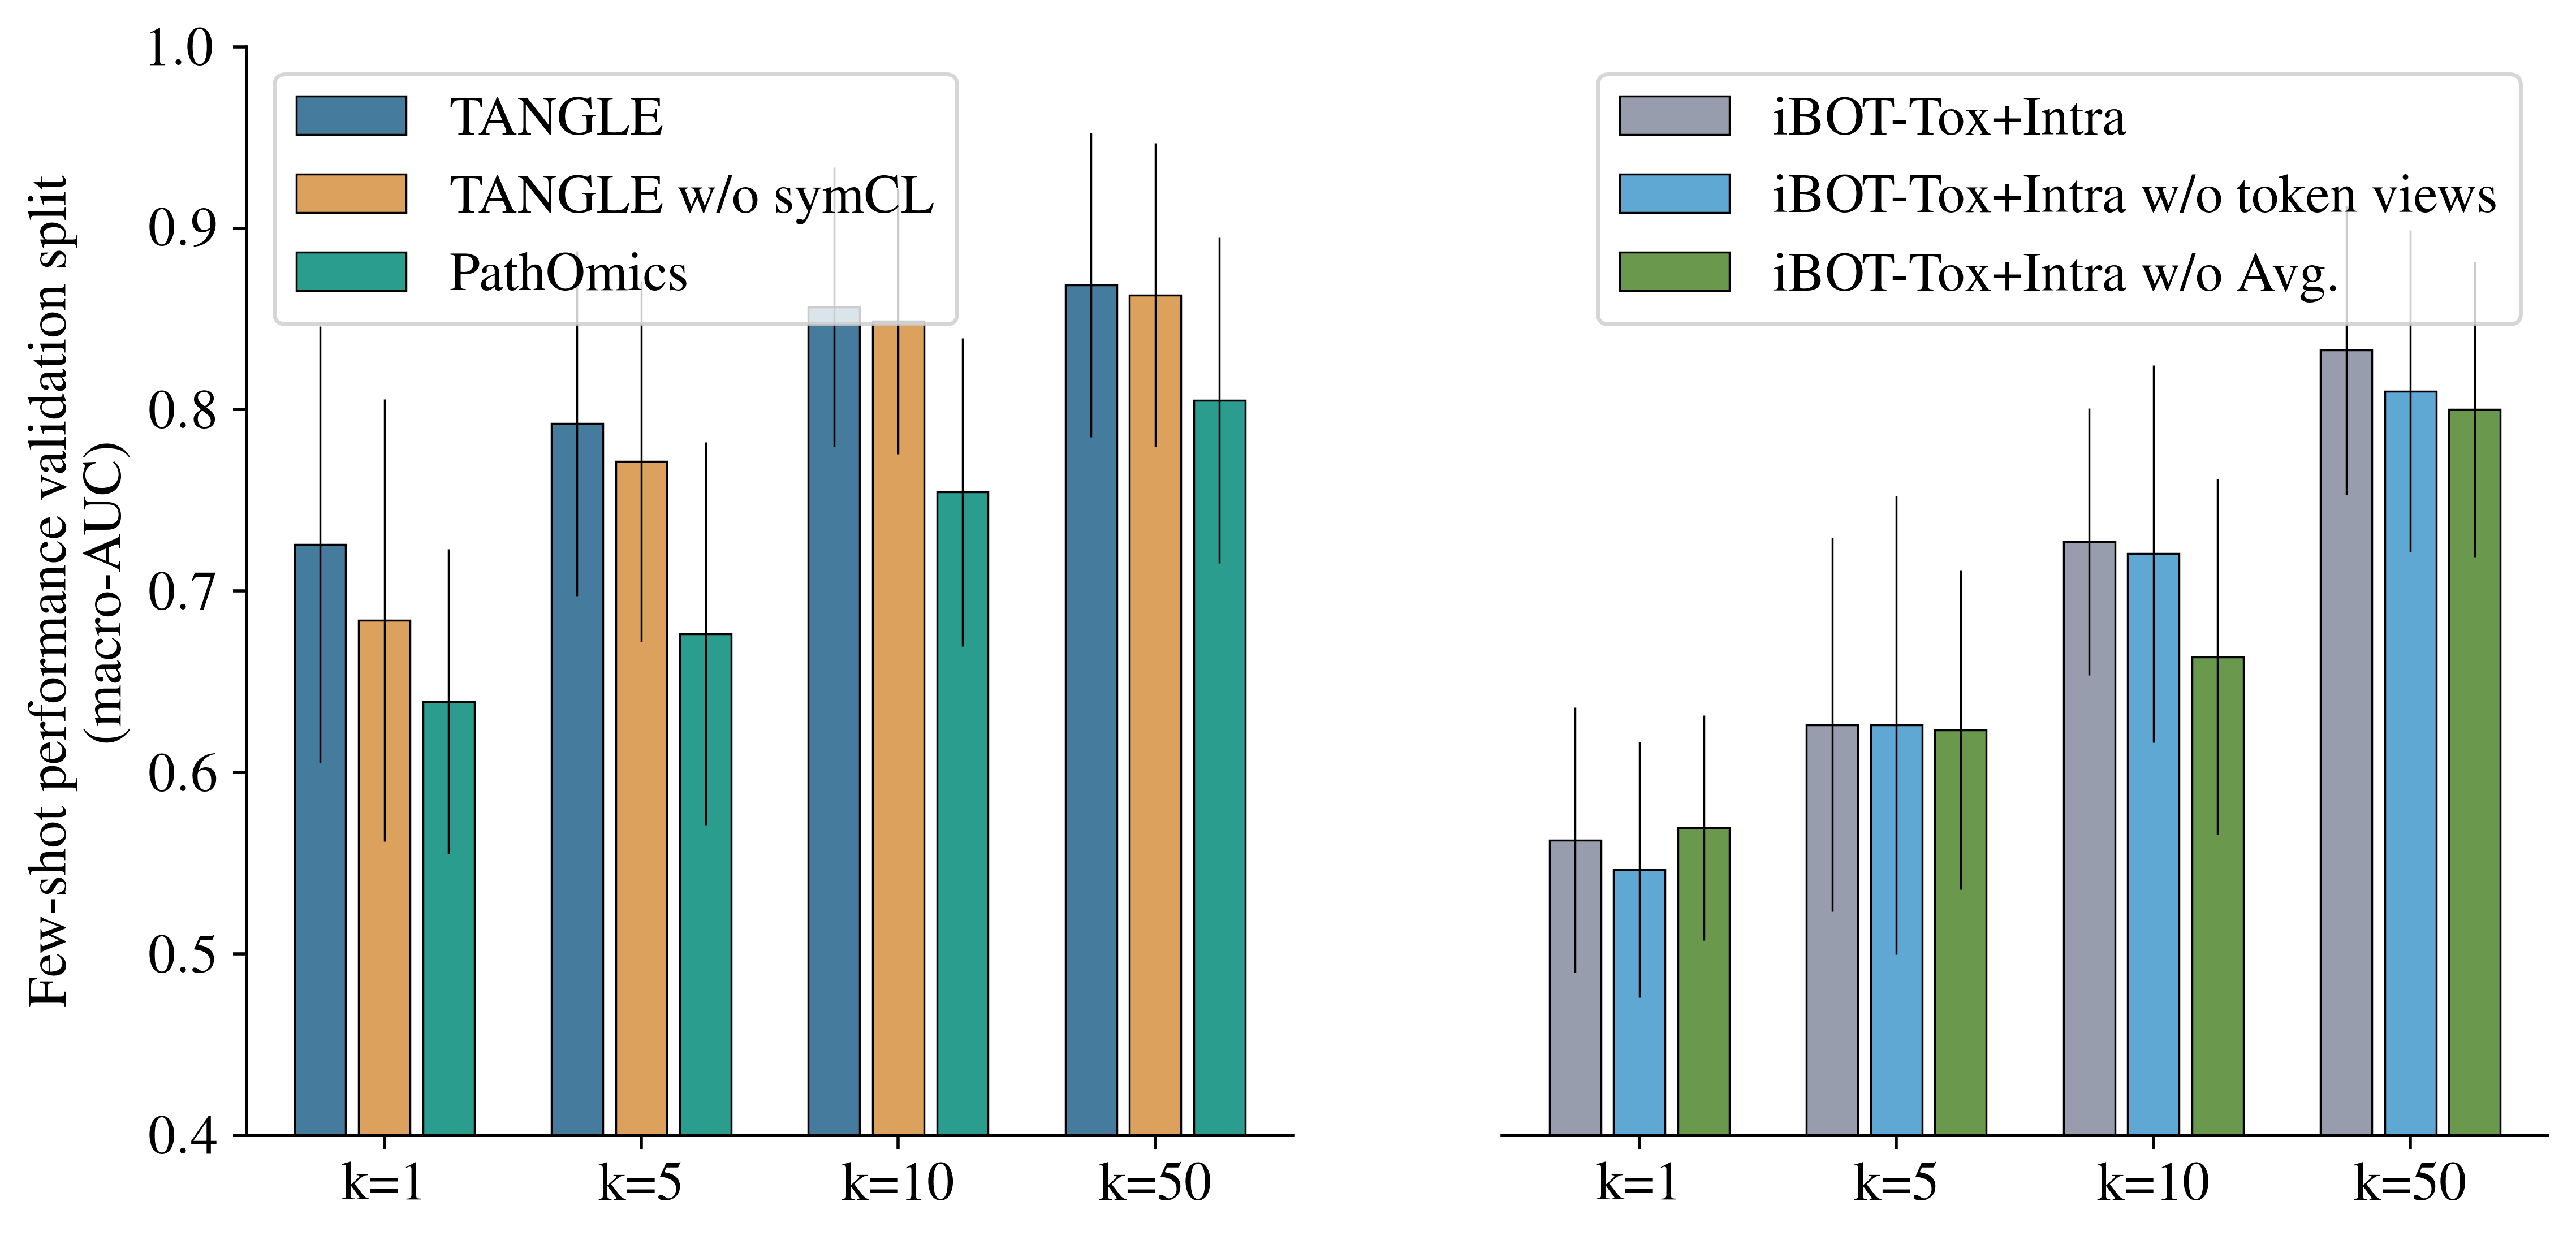

In [81]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

save_dir_plot = ''
results_csv_path = ''

models_group1 = [
        "TANGLE",
        "1411_182534ibot_abmil_softmax_rna1k_minmax_rnaAlign",
        "1411_171303ibot_abmil_softmax_rna1k_minmax_pathOmics",
        ]
models_group2 = [
        "1511_022659ibot_abmil_softmax_rna1k_minmax_intraContrastTokenViews+AvgEmb",
        "1511_012051ibot_abmil_softmax_rna1k_minmax_intraContrastAvgEmb",
        "1411_210427ibot_abmil_softmax_rna1k_minmax_intraContrastTokenViews",
          
        ]
rename_models_group1 = [
    "TANGLE",
    "TANGLE w/o symCL",
    "PathOmics",
]
rename_models_group2=[
    "iBOT-Tox+Intra",
     "iBOT-Tox+Intra w/o token views",
    "iBOT-Tox+Intra w/o Avg.",

]


colors_group1=[
    '#457B9D', # TANGLE
    '#dda15e', # TANGLE w/o symCL
    '#2a9d8f'  # PathOmics
    ]

colors_group2=[
    '#979DAC', # iBOT-Tox+Intra
    '#5fa8d3', # iBOT-Tox+Intra w/o token views
    '#6a994e', # iBOT-Tox+Intra w/o Avg.
    ]

few_shots = [1, 5, 10, 50]
string_x_axis = False
metric = "AUC"
bar_width=0.2
margin = 0.05  # Margin between the bars
y_axis_range = [0.4, 1.0]  # Replace with your desired min and max y-values
y_ticks_number = 7  # Set the desired number of y-ticks

data = pd.read_csv(results_csv_path)

# box values are model results per lesion
model_values_mean = {}
model_values_std = {}
for model in models:
    model_values_mean[f"{model}"] = {}
    model_values_std[f"{model}"] = {}
    for k in few_shots:
        key_k = f'{k}' if string_x_axis else k
        temp = []
        for lesion in data["lesion"].unique():
            if isinstance(data["k"][0], str):
                perf = data[(data['model_name']==model) & (data["k"]==f"{k}") & (data['metric']==metric) & (data['lesion'] == lesion)]["score"]
            else:
                perf = data[(data['model_name']==model) & (data["k"]==k) & (data['metric']==metric) & (data['lesion'] == lesion)]["score"]
            temp.append(perf.mean()) 
        model_values_mean[f"{model}"][key_k] = np.mean(temp) 
        model_values_std[f"{model}"][key_k] = np.std(temp)


print("MEAN VALUES")
print(model_values_mean)
print("STD VALUES")
print(model_values_std)


few_shots_labels = [f'k={k}' for k in few_shots]

fig, axes = plt.subplots(1, 2, figsize=(10.5, 5), sharey=True)
x = np.arange(len(few_shots))

error_kw = {'elinewidth': 0.5, 'ecolor': 'black'}
# Plotting for the first group of models
for i, (model, label) in enumerate(zip(models_group1, rename_models_group1)):
    means = [model_values_mean[model][k] for k in few_shots]  
    stds = [model_values_std[model][k] for k in few_shots]    
    axes[0].bar(x + (bar_width + margin)*i, means, yerr=stds, width=bar_width, label=label, 
                color=colors_group1[i], edgecolor='black', linewidth=0.5, error_kw=error_kw)

# Plotting for the second group of models
for i, (model, label) in enumerate(zip(models_group2, rename_models_group2)):
    means = [model_values_mean[model][k] for k in few_shots] 
    stds = [model_values_std[model][k] for k in few_shots]    
    axes[1].bar(x + (bar_width + margin)*i, means, yerr=stds, width=bar_width, label=label, 
                color=colors_group2[i], edgecolor='black', linewidth=0.5, error_kw=error_kw)

axes[0].set_ylabel(f'Few-shot performance validation split\n(macro-AUC)')
for ax in axes:
    ax.set_xticks(x + bar_width + margin)  
    ax.set_xticklabels(few_shots_labels)
    ax.set_ylim(y_axis_range) 
    ax.set_yticks(np.linspace(y_axis_range[0], y_axis_range[1], y_ticks_number))  
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(ax is axes[0])  
    ax.legend()
axes[1].tick_params(axis='y', which='both', left=False, labelleft=False)

plt.show()
fig.savefig("ablation_loss.pdf", format="pdf")
